In [ ]:
import os
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
supported_image_formats = ["jpg", "png", "jpeg"]

def get_image_urls_from_folder(url):
    urls = []

    os.chdir(url)

    for root, directories, files in os.walk("."):
        for filename in files: 
            if any(image_format in filename for image_format in supported_image_formats):
				            urls.append(url+"/"+filename)
    
    #Change back into starting directory
    num_slashes_in_url = url.count("/")
    backward_url = "/.."*num_slashes_in_url
    os.chdir(backward_url)
    
    return urls
   

In [ ]:
middle_finger_urls = get_image_urls_from_folder("/content/drive/MyDrive/SWP_Blitzer/middle_finger_images")
non_middle_finger_urls = get_image_urls_from_folder("/content/drive/MyDrive/SWP_Blitzer/non_middle_finger_images")

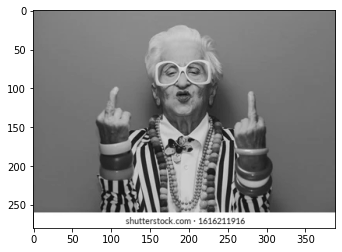

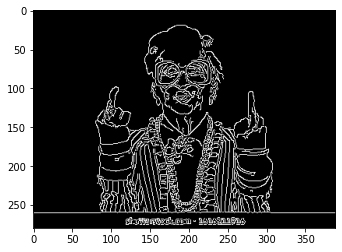

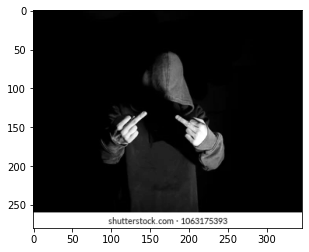

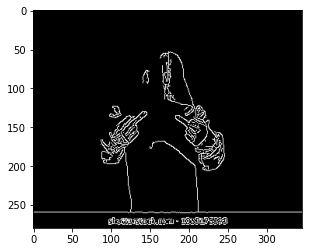

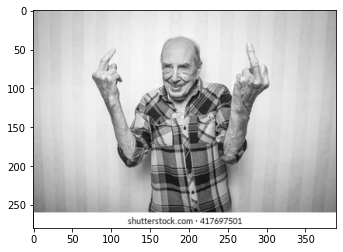

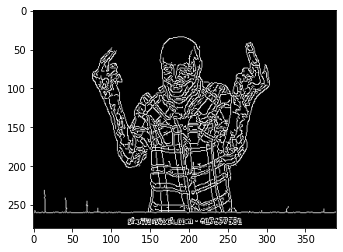

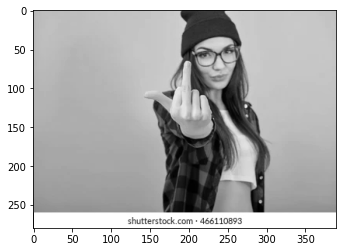

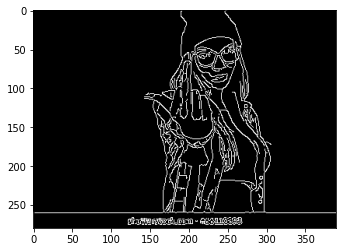

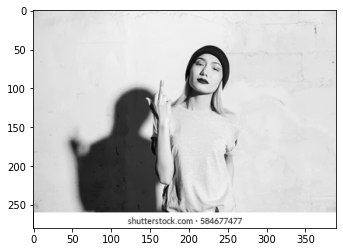

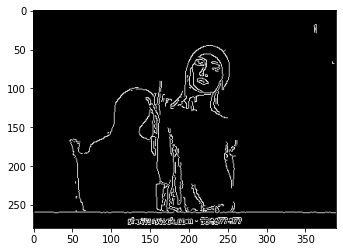

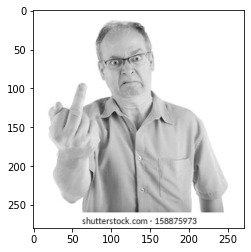

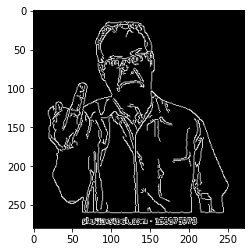

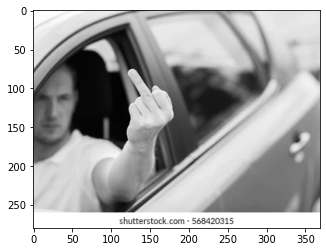

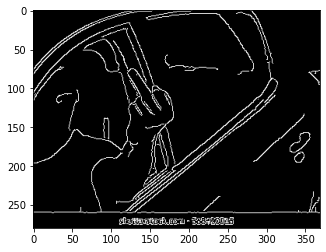

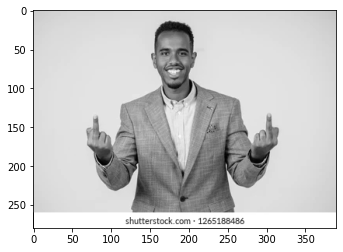

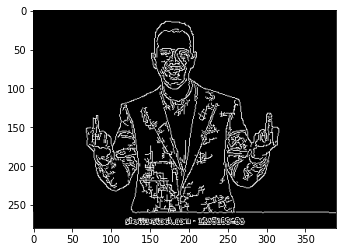

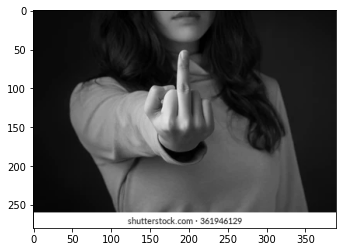

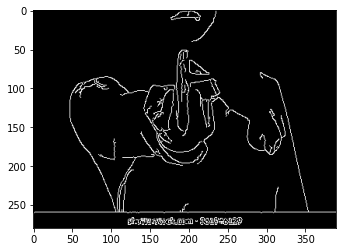

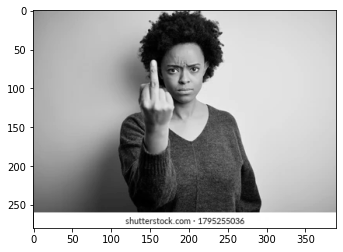

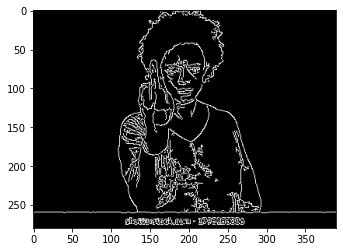

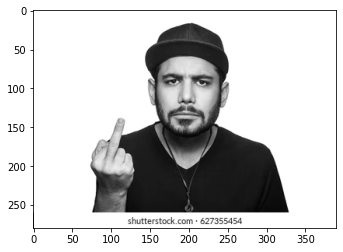

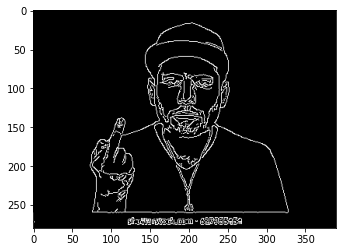

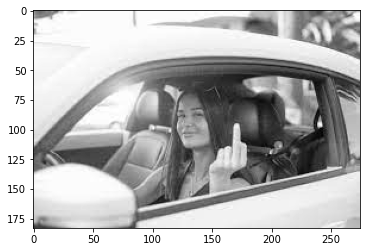

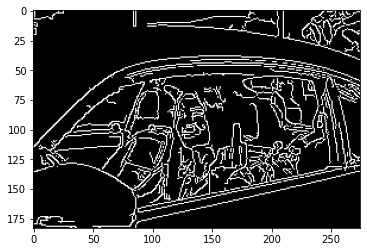

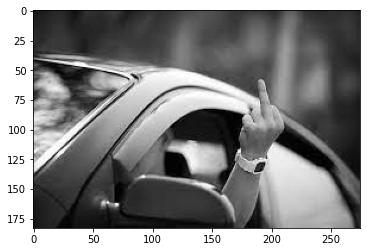

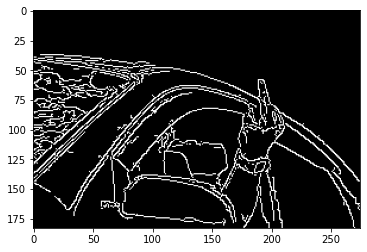

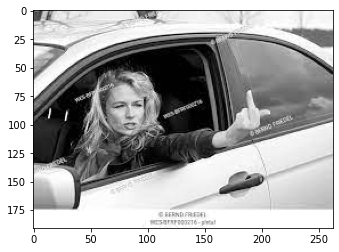

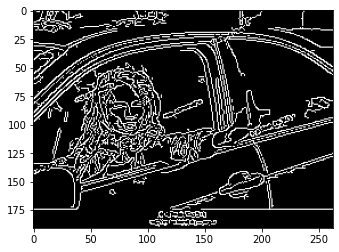

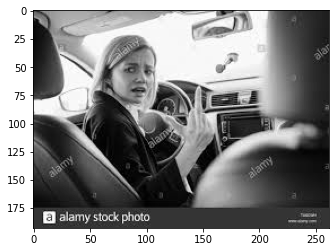

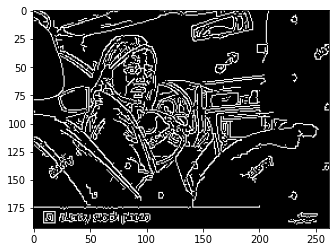

KeyboardInterrupt: ignored

In [ ]:
X = []
y = []
for url in middle_finger_urls: 
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    plt.show()
    img = cv2.Canny(img,50,200)
    plt.imshow(img, cmap="gray")
    plt.show()
    img = cv2.resize(img, (200, 200))
    
    X.append(img)
    y.append(np.array([1., 0.]))
    img_h_flipped = cv2.flip(img, 1)
    X.append(img_h_flipped)
    y.append(np.array([1., 0.]))
    img_v_flipped = cv2.flip(img, 0)
    X.append(img_v_flipped)
    y.append(np.array([1., 0.]))
    img_hv_flipped = cv2.flip(img, -1)
    X.append(img_hv_flipped)
    y.append(np.array([1., 0.]))

for url in non_middle_finger_urls: 
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img,50,200)
    img = cv2.resize(img, (200, 200))
    
    X.append(img)
    y.append(np.array([0., 1.]))
    img_h_flipped = cv2.flip(img, 1)
    X.append(img_h_flipped)
    y.append(np.array([0., 1.]))
    img_v_flipped = cv2.flip(img, 0)
    X.append(img_v_flipped)
    y.append(np.array([0., 1.]))
    img_hv_flipped = cv2.flip(img, -1)
    X.append(img_hv_flipped)
    y.append(np.array([0., 1.]))

In [ ]:
for x in X: 
    plt.imshow(x, cmap="gray")
    plt.show()

In [ ]:
len(X)

856

In [ ]:
 X, y = shuffle(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [ ]:
y_train.shape

(826, 2)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 20
epochs = 100
num_classes = 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same', input_shape=(200, 200, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
"""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same', input_shape=(500, 500, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
"""

"\nmodel = Sequential()\nmodel.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same', input_shape=(500, 500, 1)))\nmodel.add(LeakyReLU(alpha=0.1))\nmodel.add(MaxPooling2D((2, 2),padding='same'))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(64, (3, 3), activation='linear',padding='same'))\nmodel.add(LeakyReLU(alpha=0.1))\nmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(128, (3, 3), activation='linear',padding='same'))\nmodel.add(LeakyReLU(alpha=0.1))                  \nmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))\nmodel.add(Dropout(0.4))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='linear'))\nmodel.add(LeakyReLU(alpha=0.1))           \nmodel.add(Dropout(0.3))\nmodel.add(Dense(num_classes, activation='softmax'))\n"

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
model_dropout = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/100
42/42 [==============================] - 5s 73ms/step - loss: 40.8565 - accuracy: 0.5404
Epoch 2/100
42/42 [==============================] - 3s 70ms/step - loss: 6.9039 - accuracy: 0.5664
Epoch 3/100
42/42 [==============================] - 3s 71ms/step - loss: 4.1115 - accuracy: 0.6413
Epoch 4/100
42/42 [==============================] - 3s 70ms/step - loss: 2.6907 - accuracy: 0.6632
Epoch 5/100
42/42 [==============================] - 3s 70ms/step - loss: 1.7169 - accuracy: 0.6923
Epoch 6/100
42/42 [==============================] - 3s 70ms/step - loss: 1.3146 - accuracy: 0.7403
Epoch 7/100
42/42 [==============================] - 3s 70ms/step - loss: 1.3517 - accuracy: 0.6737
Epoch 8/100
42/42 [==============================] - 3s 71ms/step - loss: 0.9447 - accuracy: 0.7398
Epoch 9/100
42/42 [==============================] - 3s 71ms/step - loss: 1.0194 - accuracy: 0.7542
Epoch 10/100
42/42 [==============================] - 3s 70ms/step - loss: 0.7330 - accuracy: 0.772

In [ ]:
test_eval = model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 2.8861 - accuracy: 0.6000


In [ ]:
predictions = model.predict(X_train)

[[9.9999666e-01 3.3049189e-06]]


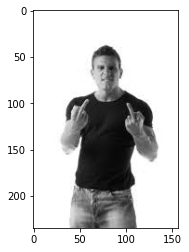

[[1.0000000e+00 1.4735365e-14]]


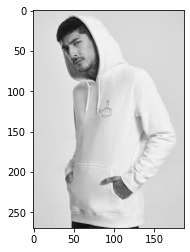

[[3.7458622e-07 9.9999964e-01]]


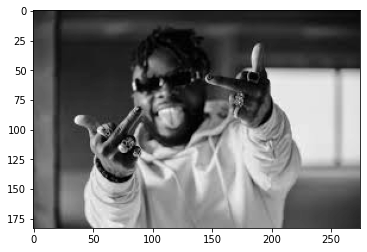

[[0.02740852 0.97259146]]


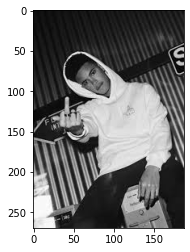

[[1.0000000e+00 1.4737669e-14]]


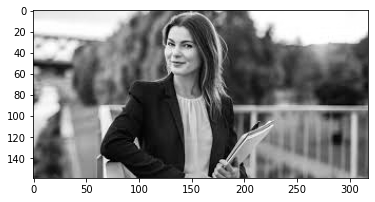

[[0.9923949  0.00760512]]


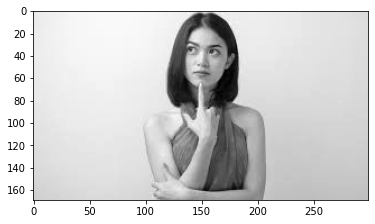

[[1.000000e+00 7.011054e-09]]


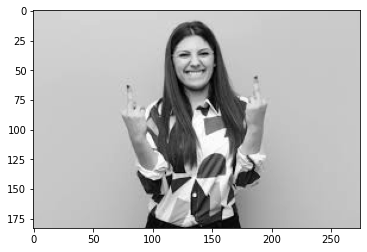

[[0.15701538 0.8429846 ]]


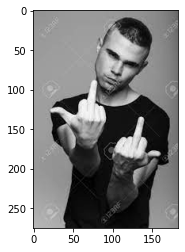

[[1.0000000e+00 8.5318574e-10]]


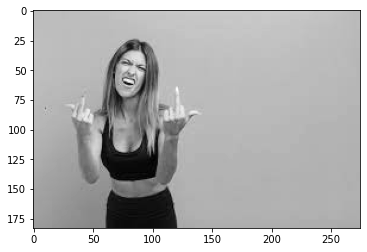

[[1.0540391e-07 9.9999988e-01]]


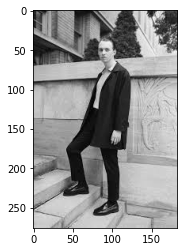

[[2.5331297e-05 9.9997473e-01]]


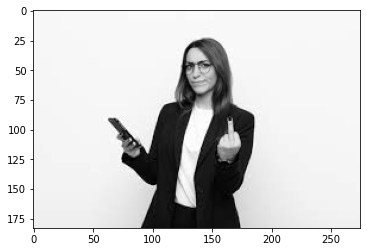

In [ ]:
test_image_urls = get_image_urls_from_folder("/content/drive/MyDrive/SWP_Blitzer/middle_finger_test_images")
for url in test_image_urls: 
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_real = img
    img = cv2.Canny(img,50,200)
    img = cv2.resize(img, (200, 200)).reshape((200, 200, 1))
    print(model.predict(np.array([img])))
    plt.imshow(img_real, cmap="gray")
    plt.show()